# Promedios móvil

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
f = '../../data/Temixco_2018_10Min.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ib      52423 non-null  float64
 1   Ig      52423 non-null  float64
 2   To      52560 non-null  float64
 3   RH      52560 non-null  float64
 4   WS      52560 non-null  float64
 5   WD      52560 non-null  float64
 6   P       52560 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


### window = 6

Si la ventana es de 6, para este conjunto de datos, es cada hora

In [3]:
tmx['To'].rolling(window=6).mean()

time
2018-01-01 00:00:00          NaN
2018-01-01 00:10:00          NaN
2018-01-01 00:20:00          NaN
2018-01-01 00:30:00          NaN
2018-01-01 00:40:00          NaN
                         ...    
2018-12-31 23:10:00    18.595000
2018-12-31 23:20:00    18.563333
2018-12-31 23:30:00    18.543333
2018-12-31 23:40:00    18.450000
2018-12-31 23:50:00    18.251667
Name: To, Length: 52560, dtype: float64

In [4]:
tmx['To'].rolling(window=6,center=True).mean()

time
2018-01-01 00:00:00          NaN
2018-01-01 00:10:00          NaN
2018-01-01 00:20:00          NaN
2018-01-01 00:30:00    18.900000
2018-01-01 00:40:00    18.988333
                         ...    
2018-12-31 23:10:00    18.543333
2018-12-31 23:20:00    18.450000
2018-12-31 23:30:00    18.251667
2018-12-31 23:40:00          NaN
2018-12-31 23:50:00          NaN
Name: To, Length: 52560, dtype: float64

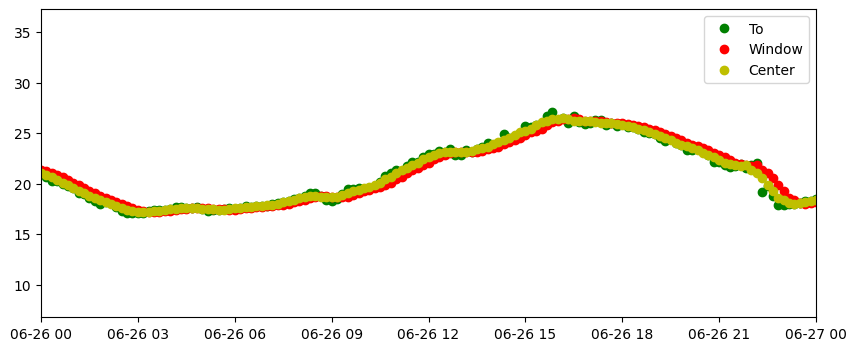

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
fecha1 = parse('2018-06-26')
fecha2 = fecha1 + pd.Timedelta('1D')

ax.plot(tmx.To,'go',label='To')
ax.plot(tmx['To'].rolling(window=6).mean(),'ro',label='Window') # Cambiar window de 6 a 1
ax.plot(tmx['To'].rolling(window=6,center=True).mean(),'yo',label='Center') # Cambiar window de 6 a 1


ax.set_xlim(fecha1,fecha2)
ax.set_xlim(fecha1,fecha2)
ax.legend()

<Axes: xlabel='time'>

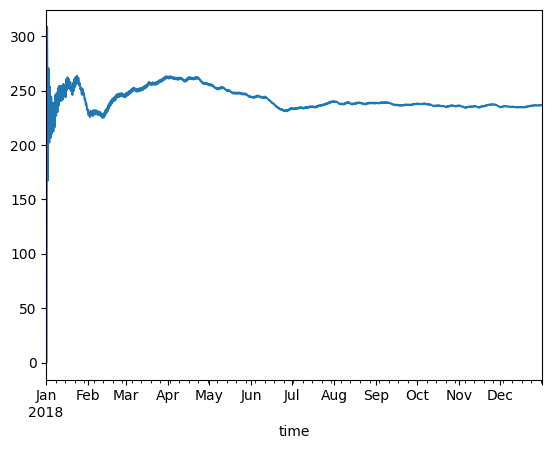

In [6]:
tmx['Ib'].expanding().mean().plot()

In [7]:
tmx.Ib.mean()

236.74272595997937

<Axes: xlabel='time'>

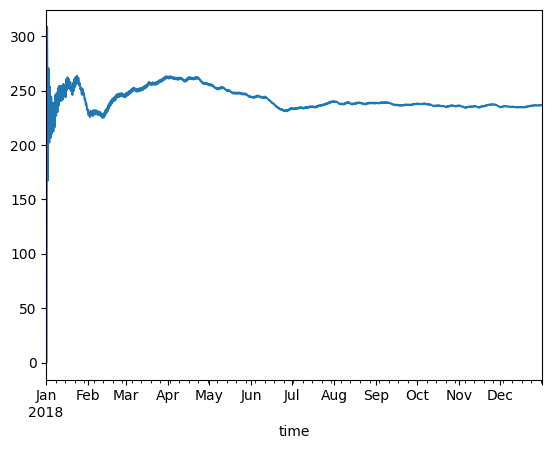

In [8]:
tmx['Ib'].expanding().mean().plot()

##  EMA en funci'on de alpha


<Axes: xlabel='time'>

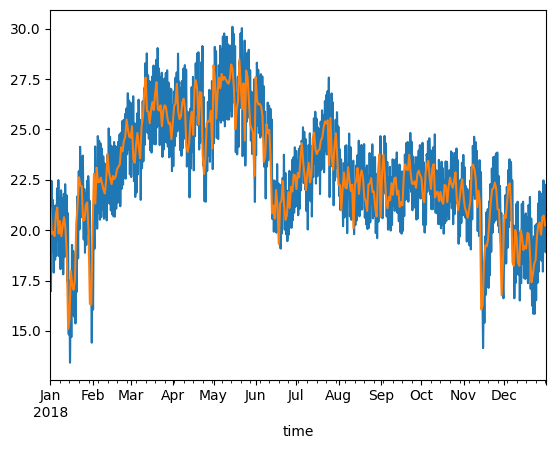

In [9]:
tmx['To'].ewm(span=144).mean().plot()
tmx.To.resample('D').mean().plot()

## Explora en rolling el uso de:
- closed
- el uso de timedelta en window
- step
- axis
- on

## Para expanding explora:
- min_periods
- axis
## Para ewm explora
- $ \text{EMA}_t = \alpha \cdot \text{Valor}_t + (1 - \alpha) \cdot \text{EMA}_{t-1} $
- span
- com
- halflife
- alpha
  